# Analysis distances between interacting digests

In this notebook, we use the script ```diachrscripts/analyze_interaction_distances_script.py``` in order to analyse the distances between interacting digests for simple, twisted, undirected and indefinable interactions.

In [12]:
# run script for Mifsud - replicate 1
OUT_PREFIX = "../results/mifsud/k_interaction_analysis_mifsud_r1"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/mifsud_2015_hg38/data/gzdir/MIFSUD_R10.interaction.counts.table.gt1.tsv.gz"
!python ../analyze_interaction_distances_script.py --out-prefix $OUT_PREFIX --status-pair-flag $STATUS_PAIR_FLAG --interaction-file $INTERACTION_FILE

	[INFO] 0 interactions processed ...
	[INFO] 1000000 interactions processed ...
[INFO] Summary statistics
	[INFO] Analysis for: ../results/mifsud/k_interaction_analysis_mifsud_r1
	[INFO] Input file: ../diachrscripts_data/mifsud_2015_hg38/data/gzdir/MIFSUD_R10.interaction.counts.table.gt1.tsv.gz
	[INFO] Status pair flag: ALL
	[INFO] Number of non ALL interactions: 0 (discarded)
	[INFO] Number of trans and short range interactions: 181256 (discarded)
	[INFO] Number of simple interactions: 3919
	[INFO] Number of twisted interactions: 3380
	[INFO] Number of undirected interactions: 104692
	[INFO] Number of indefinable interactions: 882560
[INFO] Mean distances
	[INFO] Mean simple: 56623.17351365144
	[INFO] Mean twisted: 72224.44970414201
	[INFO] Mean undirected: 65260.25724028579
	[INFO] Mean indefinable: 7509062.183318981
[INFO] Median distances
	[INFO] Median simple: 24348
	[INFO] Median twisted: 31323.0
	[INFO] Median undirected: 31965.5
	[INFO] Median indefinable: 224541.5


Figure(640

In [23]:
import numpy as np
distance_array_simple = np.load("../results/mifsud/k_interaction_analysis_mifsud_r1_distance_array_simple.npy")
distance_array_twisted = np.load("../results/mifsud/k_interaction_analysis_mifsud_r1_distance_array_twisted.npy")
distance_array_undirected = np.load("../results/mifsud/k_interaction_analysis_mifsud_r1_distance_array_undirected.npy")
distance_array_indefinable = np.load("../results/mifsud/k_interaction_analysis_mifsud_r1_distance_array_indefinable.npy")
print(distance_array_simple.mean())
print(distance_array_twisted.mean())
print(distance_array_undirected.mean())
print(distance_array_indefinable.mean())

56623.17351365144
72224.44970414201
65260.25724028579
7509062.183318981


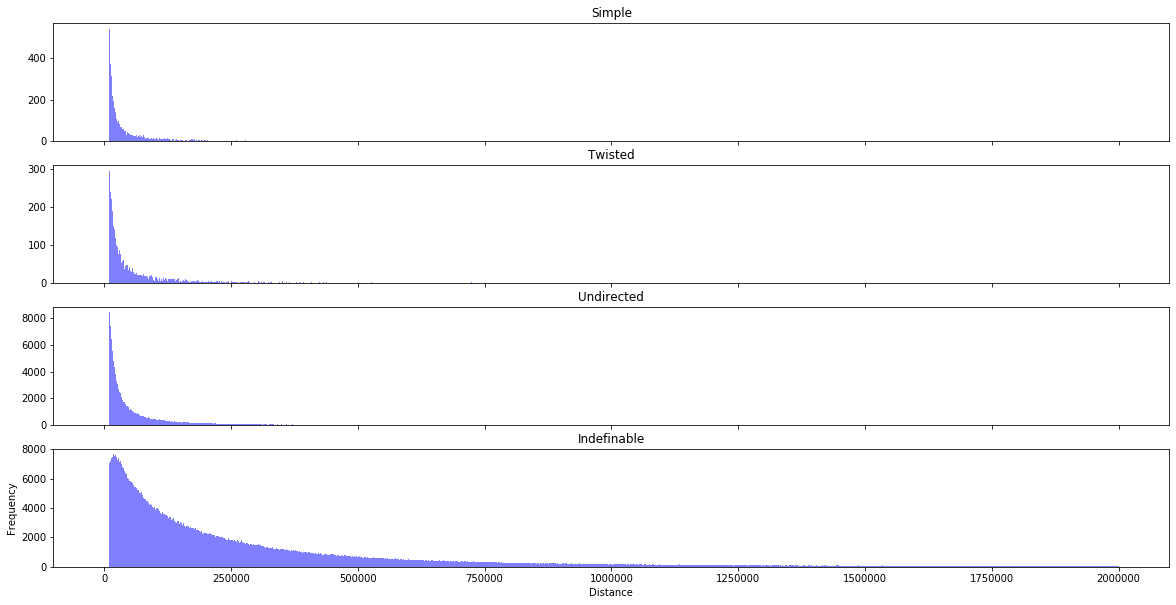

In [32]:
# Create plot
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
num_bins = 1000
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=False)
f.canvas.set_window_title('Distances between interacting digests')
plt.xlabel("Distance")
plt.ylabel("Frequency")

ax1.set_title("Simple")
n, bins, patches = ax1.hist(distance_array_simple, num_bins, facecolor='blue', alpha=0.5, range=(0,2000000))

ax2.set_title("Twisted")
n, bins, patches = ax2.hist(distance_array_twisted, num_bins, facecolor='blue', alpha=0.5, range=(0,2000000))

ax3.set_title("Undirected")
n, bins, patches = ax3.hist(distance_array_undirected, num_bins, facecolor='blue', alpha=0.5, range=(0,2000000))

ax4.set_title("Indefinable")
n, bins, patches = ax4.hist(distance_array_indefinable, num_bins, facecolor='blue', alpha=0.5, range=(0,2000000))

plt.show()